In [ ]:
## Reference: https://www.youtube.com/watch?v=xekqR10lQNo
## For personal study purposes only

In [1]:
from dowhy import datasets

import pandas as pd
import numpy as np

from causalinference import CausalModel

In [2]:
data = datasets.linear_dataset(
    beta=10,
    num_common_causes=4,
    num_samples=10_000,
    treatment_is_binary=True,
    outcome_is_binary=False,
)

df = data['df']
df = df.rename({'v0': 'treatment', 'y': 'outcome'}, axis=1)
df['treatment'] = df['treatment'].astype(int)

In [3]:
causal = CausalModel(
    Y=df['outcome'].values,
    D=df['treatment'].values,
    X=df[['W0', 'W1', 'W2', 'W3']].values,
)

print(causal.summary_stats)


Summary Statistics

                      Controls (N_c=6030)        Treated (N_t=3970)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       -3.910        3.680       14.147        3.335       18.057

                      Controls (N_c=6030)        Treated (N_t=3970)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       -0.964        0.911       -0.168        0.909        0.875
             X1       -1.046        0.979       -0.614        0.973        0.443
             X2        0.578        0.890        1.538        0.871        1.090
             X3       -0.849        0.926       -0.068        0.906        0.854



In [6]:
## propensity score estimation

causal.est_propensity_s()
print(causal.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept      0.034      0.078      0.433      0.665     -0.120      0.188
            X2      4.009      0.102     39.396      0.000      3.810      4.209
            X0      3.364      0.088     38.148      0.000      3.191      3.537
            X3      3.299      0.095     34.835      0.000      3.114      3.485
            X1      1.886      0.064     29.460      0.000      1.760      2.011
         X3*X1      0.107      0.048      2.220      0.026      0.013      0.201



In [13]:
import seaborn as sns

<Axes: xlabel='propensity', ylabel='Probability'>

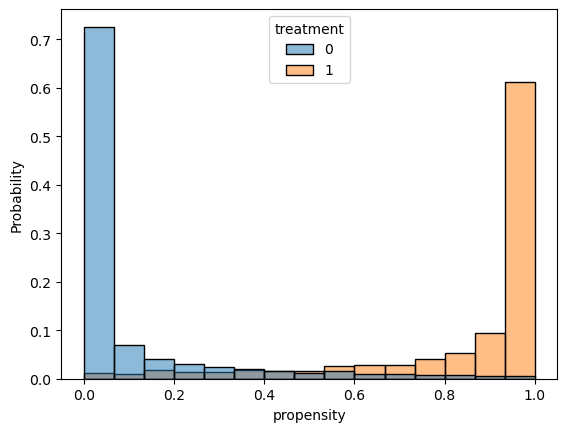

In [17]:
df['propensity'] = causal.propensity['fitted']

sns.histplot(
    data =df, x='propensity', 
    hue='treatment', stat='probability', common_norm=False,
)

In [7]:
causal.cutoff

In [18]:
causal.trim_s()

In [23]:
len(causal.propensity['fitted']), np.min(causal.propensity['fitted']), np.max(causal.propensity['fitted'])

<Axes: xlabel='propensity', ylabel='Probability'>

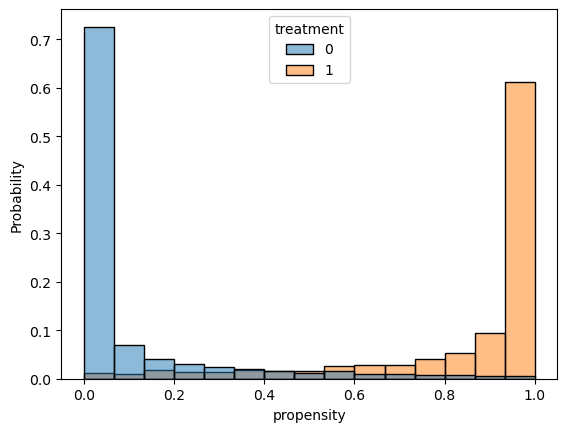

In [19]:
df['propensity'] = causal.propensity['fitted']

sns.histplot(
    data =df, x='propensity', 
    hue='treatment', stat='probability', common_norm=False,
)

In [24]:
print(causal.summary_stats)


Summary Statistics

                      Controls (N_c=1457)        Treated (N_t=1352)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.046        1.270       11.212        1.282       11.167

                      Controls (N_c=1457)        Treated (N_t=1352)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       -0.584        0.844       -0.457        0.841        0.150
             X1       -0.825        0.954       -0.767        0.928        0.062
             X2        1.060        0.808        1.193        0.779        0.167
             X3       -0.479        0.873       -0.362        0.856        0.136

